In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from marl.utils import tb_utils
from marl_experiments.roshambo import roshambo_bot

In [9]:
names = []
payoffs = []

for index, bot in enumerate(roshambo_bot.ROSHAMBO_BOT_NAMES):
    try:    
        path = f"/scratch/wellman_root/wellman1/mxsmith/results/marl/roshambo/br_ps2/wid_{index}/eval_arena/"
        eval_df = tb_utils.events_to_dataframe(path)
        payoff = float((list(eval_df["eval_return/0"])[-1]))
        print(f"{payoff}")
        names.append(bot)
        payoffs.append(payoff)
    except Exception as e:
        print(f"{bot}")

-368.3999938964844
31.200000762939453
-5.0
998.7999877929688
11.800000190734863
-987.7999877929688
-913.0
501.0
77.0
-0.6000000238418579
185.0
-13.600000381469727
599.0
-444.79998779296875
-834.0
-623.5999755859375
-363.0
-864.2000122070312
-396.20001220703125
-550.2000122070312
-371.3999938964844
-326.20001220703125
-458.3999938964844
10.0
854.4000244140625
-857.2000122070312
38.0
-384.79998779296875
-512.2000122070312
414.20001220703125
-3.4000000953674316
-711.5999755859375
1000.0
667.0
-714.2000122070312
-470.79998779296875
205.0
-316.3999938964844
-361.6000061035156
208.60000610351562
332.79998779296875
185.0
-533.5999755859375


In [12]:
names = [x for _, x in sorted(zip(payoffs, names), key=lambda pair: pair[0], reverse=True)]
payoffs = sorted(payoffs, reverse=True)

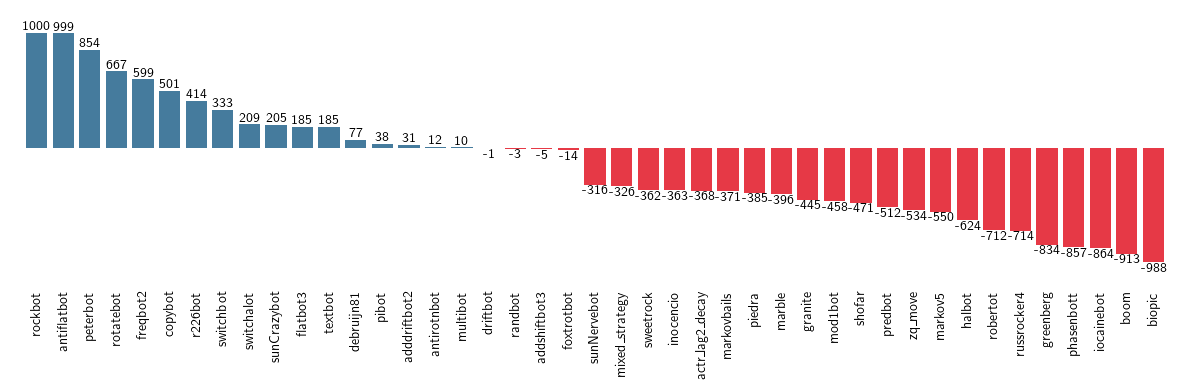

In [45]:
fig, ax = plt.subplots(figsize=(12, 4))

bars = ax.bar(np.arange(len(payoffs)), payoffs, color=np.where(np.asarray(payoffs)>0, "#457B9D", "#E63946"))
ax.bar_label(bars, fmt="%.0f")

ax.set_xticks(np.arange(len(names)), labels=names, rotation=90)

ax.get_yaxis().set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.tick_params(axis="both", length=0)

ax.set_xlim(-1, 43)
ax.set_ylim(-1_200, 1_200)

plt.tight_layout()
plt.show()